In [17]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import scipy.stats as stats
df = pd.read_csv("data/final_elected.csv")
from matplotlib import pyplot as plt
df.head()

,Province,Federal Electoral Districts,FED ID,Population,Electors,Polling Stations,Valid Ballots,Percentage of Valid Ballots,Rejected Ballots,Percentage of Rejected Ballots,Total Ballots Cast,Percentage of Voter Turnout,Party Won
0,Newfoundland and Labrador,Avalon,10001,81540,68487,220,42086,99.6,162,0.4,42248,61.7,Liberal
1,Newfoundland and Labrador,Bonavista--Burin--Trinity,10002,76704,62462,260,35092,99.5,173,0.5,35265,56.5,Liberal
2,Newfoundland and Labrador,Coast of Bays--Central--Notre Dame,10003,78092,64226,233,35448,99.6,145,0.4,35593,55.4,Liberal
3,Newfoundland and Labrador,Labrador,10004,26728,20045,84,12373,99.6,53,0.4,12426,62.0,Liberal
4,Newfoundland and Labrador,Long Range Mountains,10005,87592,71918,253,41824,99.7,108,0.3,41932,58.3,Liberal


In [4]:
df2=df[["Electors", "Total Ballots Cast", "Party Won"]]
df2

,Electors,Total Ballots Cast,Party Won
0,68487,42248,Liberal
1,62462,35265,Liberal
2,64226,35593,Liberal
3,20045,12426,Liberal
4,71918,41932,Liberal
...,...,...,...
333,94627,72136,NDP
334,90554,66631,Liberal
335,26879,20385,Liberal
336,30110,19077,Liberal


In [30]:
df2["Turnout"]=df2["Total Ballots Cast"]/df2["Electors"]
df2.head(50)


,Electors,Total Ballots Cast,Party Won,Turnout
0,68487,42248,Liberal,0.616876
1,62462,35265,Liberal,0.564583
2,64226,35593,Liberal,0.554184
3,20045,12426,Liberal,0.619905
4,71918,41932,Liberal,0.583053
5,66304,44991,Liberal,0.678556
6,67596,44934,Liberal,0.664743
7,28889,22581,Liberal,0.781647
8,28129,21264,Liberal,0.755946
9,27858,21449,Liberal,0.769940


In [32]:
Liberal = df2.loc[df2["Party Won"] == "Liberal"]
Conservative =df2.loc[df2["Party Won"] == "Conservative"]
NDP = df2.loc[df2["Party Won"] == "NDP"]
Bloc = df2.loc[df2["Party Won"] == "Bloc Québécois"]

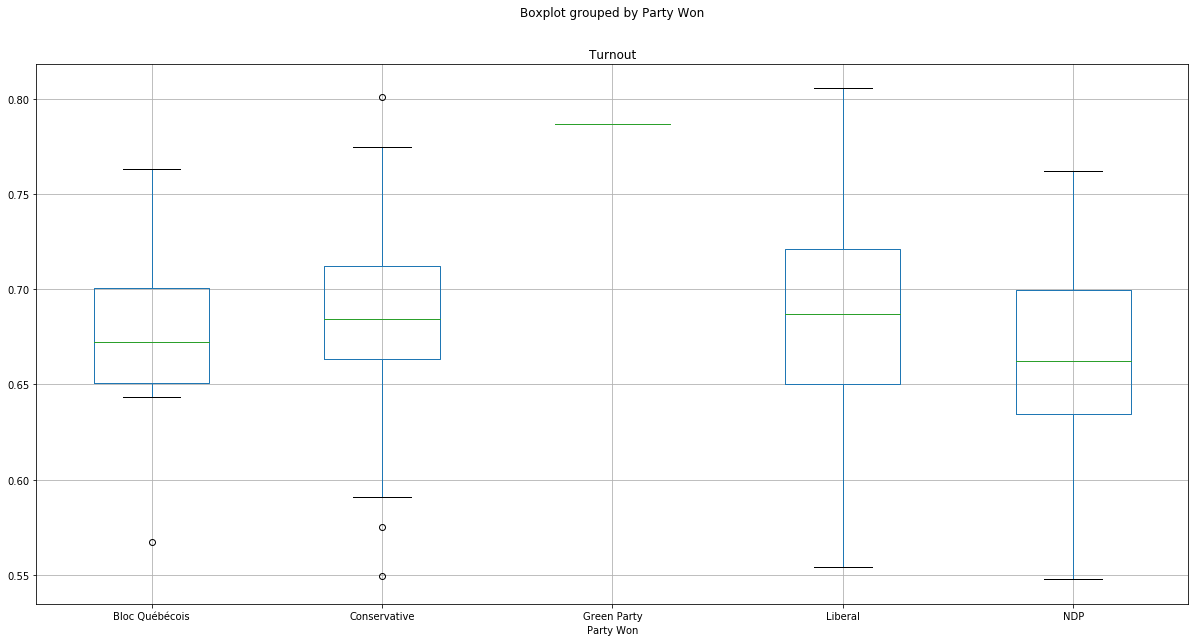

In [8]:
fig= df2.boxplot("Turnout", by="Party Won", figsize=(20, 10))
fig.figure.savefig("./PNG_images_stats/Turnout.png")

In [9]:
group1 = df2[df2["Party Won"] == "Bloc Québécois"]["Turnout"]
group2 = df2[df2["Party Won"] == "Conservative"]["Turnout"]
group3 = df2[df2["Party Won"] == "Green Party"]["Turnout"]
group4 = df2[df2["Party Won"] == "Liberal"]["Turnout"]
group5 = df2[df2["Party Won"] == "NDP"]["Turnout"]

In [10]:
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=2.155657399711222, pvalue=0.0737331089978209)

In [11]:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=3.3125258872095653, pvalue=0.0401946332810445)

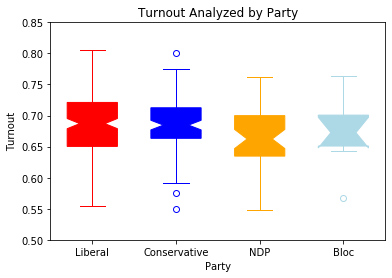

In [40]:
#fig=plt.figure(figsize=(8,3))
fig,ax = plt.subplots(figsize=(6,4))
box_plot_data=[Liberal["Turnout"], Conservative["Turnout"],NDP["Turnout"],Bloc["Turnout"]]
x_label_list = ["Liberal", "Conservative", "NDP","Bloc",]
ax.set_xticklabels(x_label_list)
c="grey"
ax.set_ylim([.5,0.85])
c="red"
c1="blue"
c2="orange"
c3="lightblue"
plt.boxplot(box_plot_data[0], positions=[0],widths = 0.6, notch=True, patch_artist=True, boxprops=dict(facecolor=c, color=c),capprops=dict(color=c), whiskerprops=dict(color=c), flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c))
plt.boxplot(box_plot_data[1], positions=[1],widths = 0.6, notch=True, patch_artist=True, boxprops=dict(facecolor=c1, color=c1),capprops=dict(color=c1), whiskerprops=dict(color=c1), flierprops=dict(color=c1, markeredgecolor=c1),medianprops=dict(color=c1))
plt.boxplot(box_plot_data[2], positions=[2], widths = 0.6,notch=True, patch_artist=True, boxprops=dict(facecolor=c2, color=c2),capprops=dict(color=c2), whiskerprops=dict(color=c2), flierprops=dict(color=c2, markeredgecolor=c2),medianprops=dict(color=c2))
plt.boxplot(box_plot_data[3], positions=[3],widths = 0.6, notch=True, patch_artist=True, boxprops=dict(facecolor=c3, color=c3),capprops=dict(color=c3), whiskerprops=dict(color=c3), flierprops=dict(color=c3, markeredgecolor=c3),medianprops=dict(color=c3))
#ax.set_xlabel = "Age Groups"
#ax.set_ylabel = "Number of Voters"
#ax.set_title = "Liberal Ridings Analyzed by Age"
plt.xlabel("Party")
plt.ylabel("Turnout")
plt.title("Turnout Analyzed by Party")
plt.savefig("./PNG_images_stats/turnout4party.png", transparent = True)
plt.show()